#            HSDC Stage- D
# Data Storytelling in Pattern Recognition
by Sakshi Jha

**Aim of the project:**

To visualize the datasets, gather insights and pattern and construct a story on how the world food shortage problem can be solved using these patterns and insights.

**Given:** 
provided with these datasets:


*    Africa Food Production (2004 - 2013).csv
*    Africa Food Supply (2004 - 2013).csv





**Dataset description :**

The datasets are African food production dataset from 2004 to 2013 and African food supply dataset from 2004 to 2013; used for this project  include information about the production and supply data in various countiries of africa from 2004 to 2013.

The food production dataset contains 4 columns namely; country, item (item produced), year and value and 23110 rows. The unit of the food production value is in Kilotons (kt)

The food supply dataset contains 3 columns namely; country, year, value and 450 rows. The unit of the food supply value is in kcal/person/day

Ultimately, Both datasets contain data for 45 African countries.

**TASK :**

Visualisations and narratives should include;

Trends in food production and consumption over the years,
average and median food production, the outliers, quartiles and interquartiles ranges (boxplot)

A comparison between average food consumption and production for each year

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#food production dataset
food_prod= pd.read_csv('/content/drive/MyDrive/Africa Food Production (2004 - 2013).csv')
#food supply dataset
food_sup = pd.read_csv('/content/drive/MyDrive/Africa Food Supply (2004 - 2013).csv')
#food_sup

In [3]:
#inspecting food production dataframe
print(food_prod.head())

   Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111


In [4]:
#inspecting food supply dataframe
print(food_sup.head())

   Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048


In [8]:
#summary of prodn dataset
print(food_prod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB
None


In [9]:
#summary of supply dataset
print(food_sup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB
None


In [14]:
#checking for missing values in the dataframes
print(food_prod.isna().sum())
print('=============')
print(food_sup.isna().sum())

Country    0
Item       0
Year       0
Value      0
dtype: int64
Country    0
Year       0
Value      0
dtype: int64


No missing values 

In [15]:
#statistical summary of prodn dataframe
food_prod.describe(include='all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [16]:
#statistical summary of food supply dataframe
food_sup.describe(include='all')

,Country,Year,Value
count,450,450.000000,450.000000
unique,45,NaN,NaN
top,Algeria,NaN,NaN
freq,10,NaN,NaN
mean,NaN,2008.500000,2469.775556
std,NaN,2.875478,379.140143
min,NaN,2004.000000,1781.000000
25%,NaN,2006.000000,2174.000000
50%,NaN,2008.500000,2376.000000
75%,NaN,2011.000000,2681.750000


# Exploratory Data Analysis

**Country-wise production trends**

In [18]:
#average production value by year
food_prod.groupby('Country')['Value'].mean()

Country
Algeria                         325.258621
Angola                          362.035185
Benin                           149.274576
Botswana                         14.141176
Burkina Faso                    232.858140
Cabo Verde                        5.024242
Cameroon                        304.107692
Central African Republic         55.380000
Chad                            115.584615
Congo                            51.582000
Cote d'Ivoire                   285.134375
Djibouti                          3.027273
Egypt                          1253.568571
Ethiopia                        584.488333
Gabon                            33.915000
Gambia                           13.052778
Ghana                           508.627586
Guinea                          133.696000
Guinea-Bissau                    16.581818
Kenya                           342.496000
Lesotho                          16.456522
Liberia                          34.897619
Madagascar                      192.856522
Mal

In [20]:
#creating a new dataframe that contains the average production value for each country
CPD = pd.DataFrame(food_prod.groupby('Country')['Value'].mean()).reset_index(inplace=False) 
print(CPD)

                        Country        Value
0                       Algeria   325.258621
1                        Angola   362.035185
2                         Benin   149.274576
3                      Botswana    14.141176
4                  Burkina Faso   232.858140
5                    Cabo Verde     5.024242
6                      Cameroon   304.107692
7      Central African Republic    55.380000
8                          Chad   115.584615
9                         Congo    51.582000
10                Cote d'Ivoire   285.134375
11                     Djibouti     3.027273
12                        Egypt  1253.568571
13                     Ethiopia   584.488333
14                        Gabon    33.915000
15                       Gambia    13.052778
16                        Ghana   508.627586
17                       Guinea   133.696000
18                Guinea-Bissau    16.581818
19                        Kenya   342.496000
20                      Lesotho    16.456522
21        

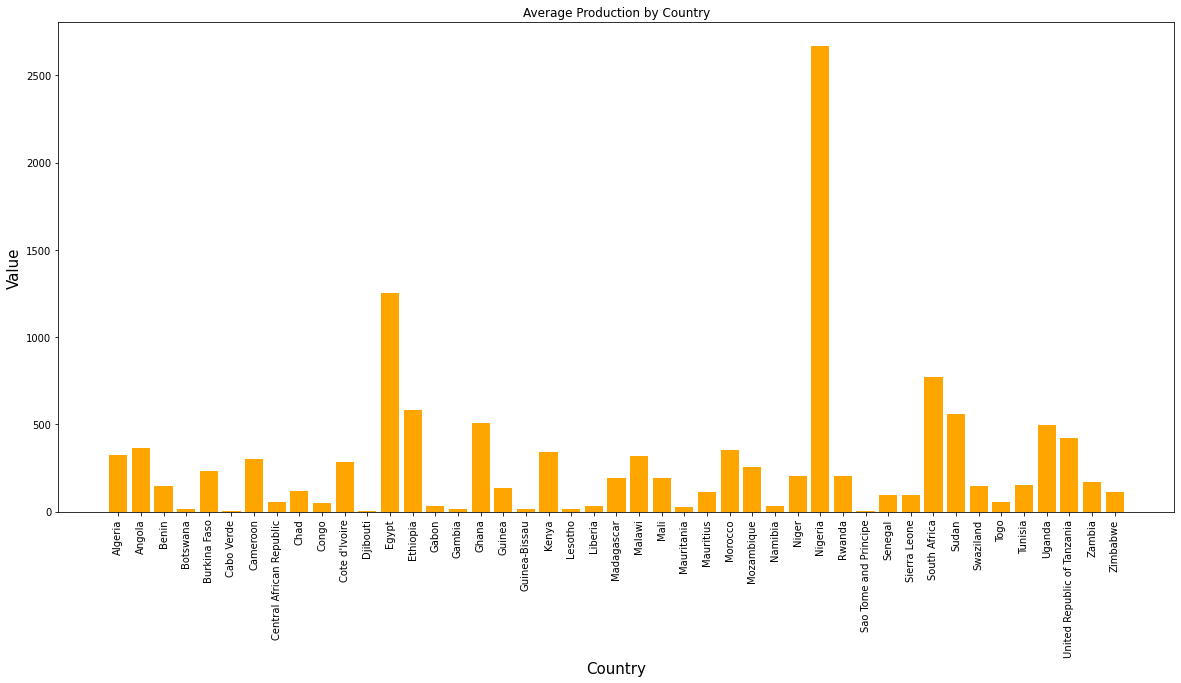

In [26]:
#bar chart showing production value by country
fig= plt.figure(figsize=(20, 9))
plt.bar(CPD['Country'],CPD['Value'],color='orange')
plt.title('Average Production by Country')
plt.xlabel('Country', fontsize= 15)
plt.ylabel('Value', fontsize= 15)
plt.xticks(rotation=90)
plt.show()

It can be seen from the plot that Egypt, Euthopia, Ghana, South Africa and 
sudan are only countries with production values >500.

Evidently; Nigeria, Egypt and South Africa are amongst the top food producing countries in Africa.

In [28]:
#average food suppy from supply dataset:
cou_sup = pd.DataFrame(food_sup.groupby('Country')['Value'].mean()).reset_index(inplace=False)
cou_sup

,Country,Value
0,Algeria,3111.8
1,Angola,2255.6
2,Benin,2537.8
3,Botswana,2226.3
4,Burkina Faso,2607.2
5,Cabo Verde,2551.4
6,Cameroon,2460.3
7,Central African Republic,2071.9
8,Chad,2051.1
9,Congo,2153.0


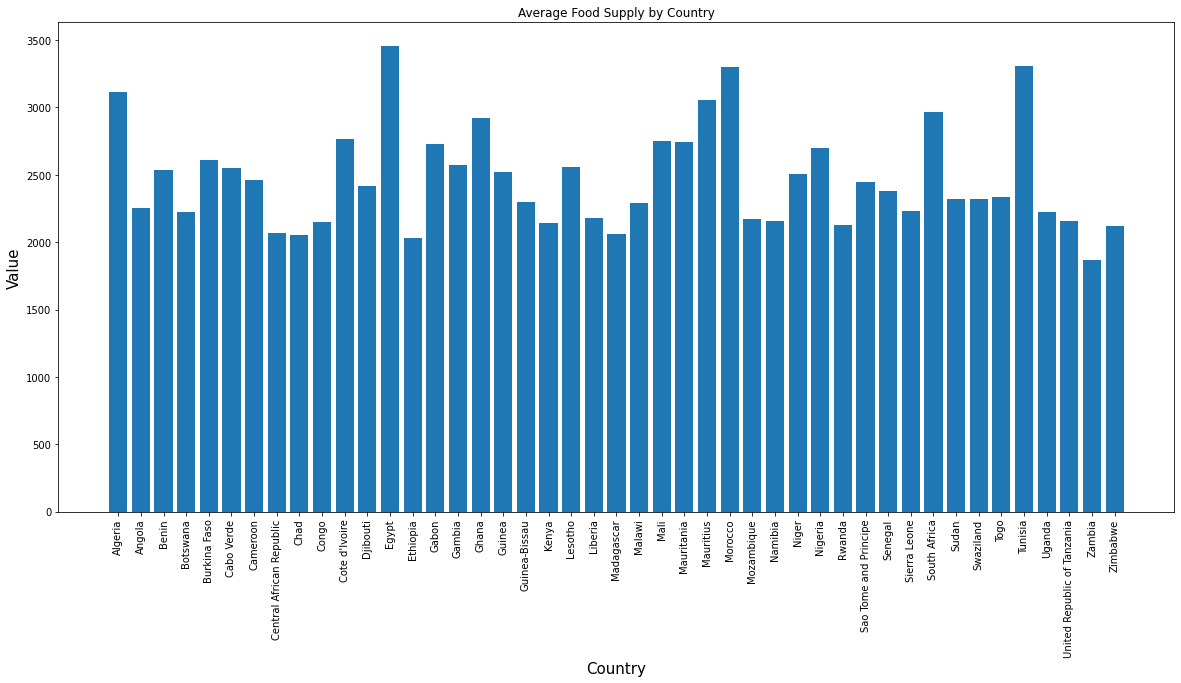

In [29]:
#plotting cou_sup values:
fig= plt.figure(figsize=(20, 9))
plt.bar('Country','Value', data= cou_sup)
plt.title('Average Food Supply by Country')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.xticks(rotation=90)
plt.show()

 Egypt, Morocco and Tunisia are countries that supply the most food.

**Trends in food production over the years**

In [30]:
#average production value by year
food_prod.groupby('Year')['Value'].mean()

Year
2004    286.767301
2005    298.986592
2006    310.814014
2007    305.215830
2008    318.686851
2009    323.040657
2010    340.166955
2011    351.303633
2012    364.831816
2013    378.227568
Name: Value, dtype: float64

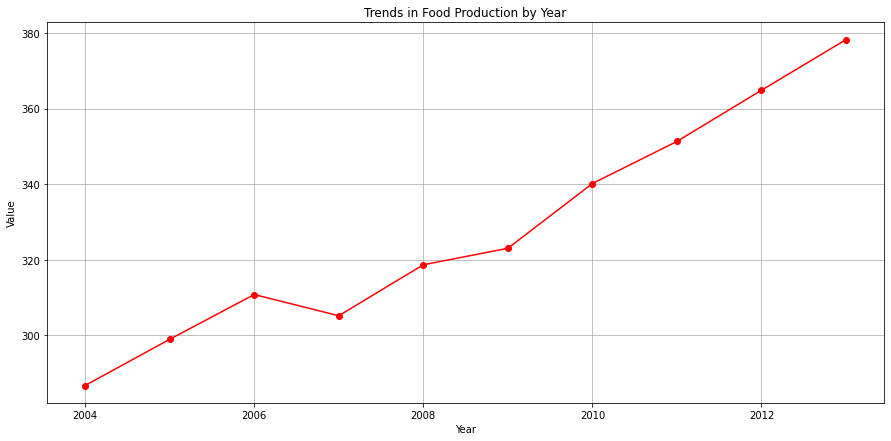

In [31]:
#plotting line chart to show trends over the years
fig= plt.figure(figsize=(15, 7))
plt.plot(food_prod.groupby('Year')['Value'].mean(), marker='o', color='red')
plt.title('Trends in Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()

Food production has been increasing exponentially from 2004-2006 and 2009 -2013
although there had been a rise and fall over 2006- 2009.
Production dropped lowest in year 2007.

Trends in supply over the years

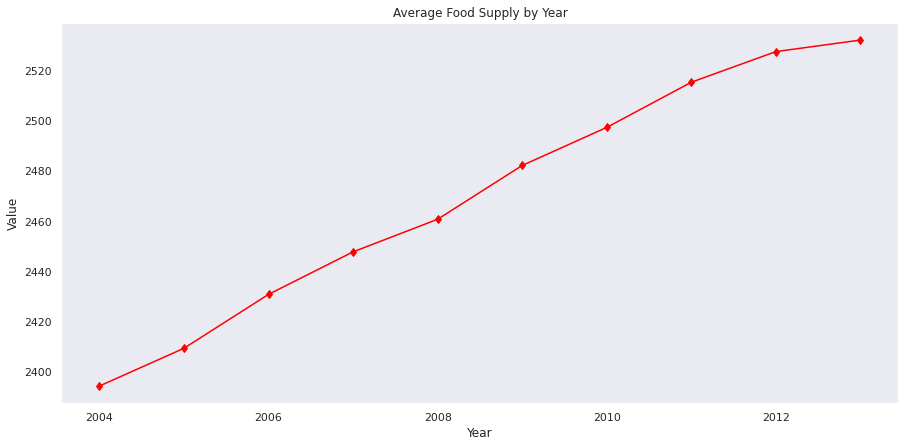

In [91]:
#plotting line chart to show trends
fig= plt.figure(figsize=(15, 7))
plt.plot(food_sup.groupby('Year')['Value'].mean(), marker='d', color='red')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()

In [92]:
#Median food production by year
food_prod.groupby('Year')['Value'].median()

Year
2004    16.0
2005    16.0
2006    17.0
2007    17.0
2008    18.0
2009    18.0
2010    20.0
2011    21.0
2012    21.0
2013    22.0
Name: Value, dtype: float64

**Trends of Food Items Produced in Africa**

In [ ]:
#d-dataset
item_prod= pd.DataFrame(food_prod.groupby('Item')['Value'].mean()).reset_index(inplace=False)
item_prod

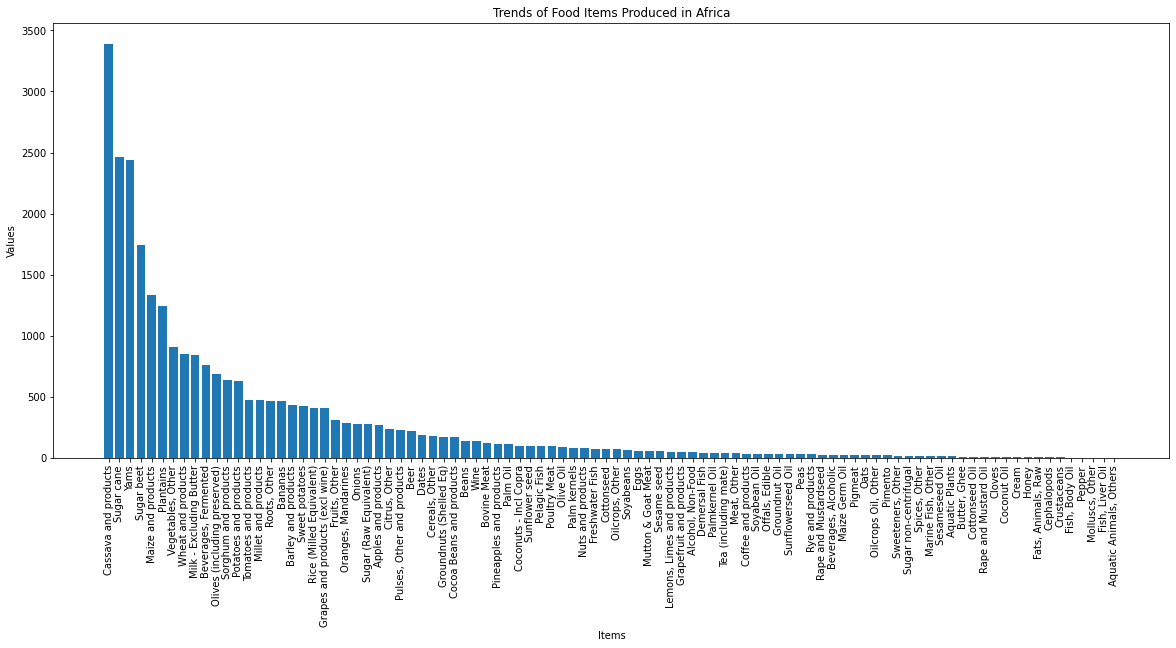

In [35]:
item_sorted = item_prod.sort_values('Value', ascending=False) #from highest to lowest
fig= plt.figure(figsize=(20,8))
plt.bar('Item', 'Value',data=item_sorted)
plt.xlabel("Items")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.title("Trends of Food Items Produced in Africa")
plt.show()

The top 3 food items produced in Africa are: Cassava and products, Sugar cane, Yams.
Least are Fats and marine animals and raw products are amongst least produced
certain quantities are negligible.

**Comparison between average food consumption and production for each year**

In [42]:
#creating a new dataframe that shows the average number of food item produced each year
f_prod=pd.DataFrame(food_prod.groupby('Year')['Value'].mean()).reset_index(inplace= False)
f_prod


,Year,Value
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [48]:
#renaming the value column to avoid confusion
f_prod.rename(columns={"avg_sply_val": "avg_prd"}, inplace=True)
f_prod

,Year,avg_prd
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [ ]:
#creating a new dataframe that shows the average number of food item supplied each year
f_sup=pd.DataFrame(food_sup.groupby('Year')['Value'].mean()).reset_index(inplace= False)
f_sup

In [51]:
#renaming the value column to avoid confusion
f_sup.rename(columns={"Value": "avg__supplied"}, inplace=True)

In [52]:
#letss merge
prod_n_sup = pd.merge(f_prod, f_sup, on='Year')
prod_n_sup


,Year,avg_prd,avg__supplied
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556
5,2009,323.040657,2482.222222
6,2010,340.166955,2497.400000
7,2011,351.303633,2515.422222
8,2012,364.831816,2527.644444
9,2013,378.227568,2532.244444


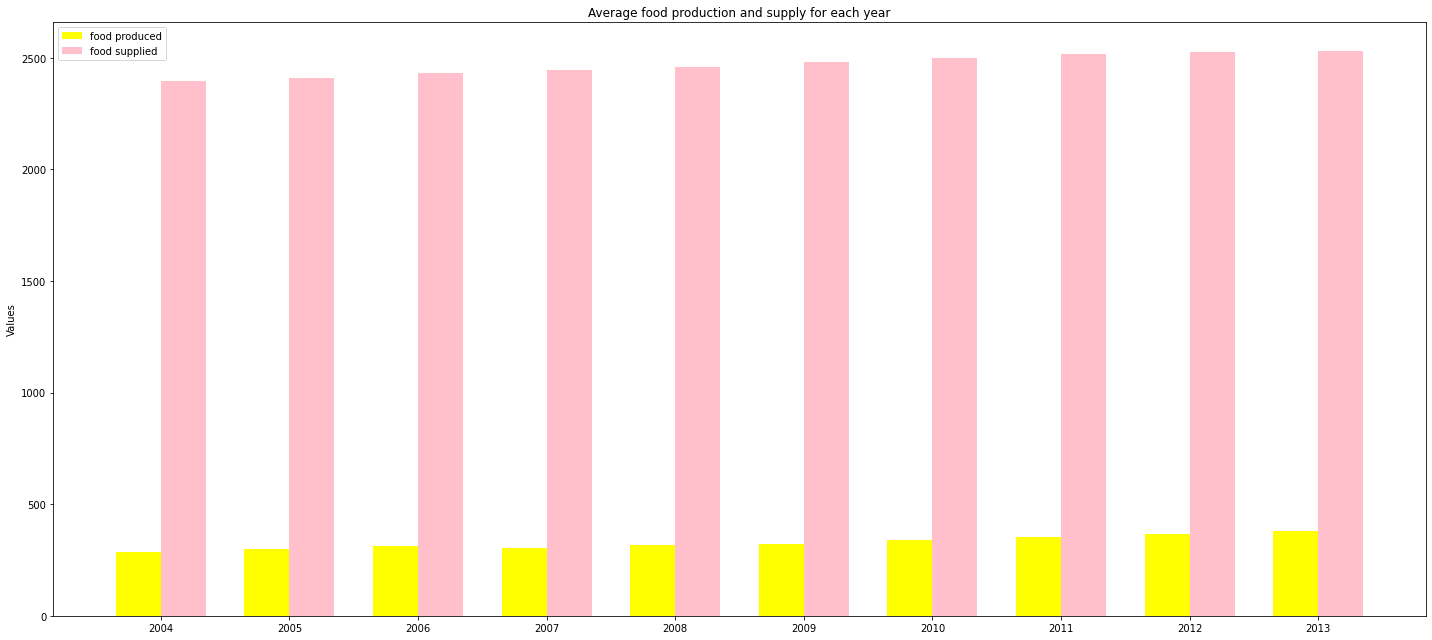

In [63]:
fig= plt.figure(figsize=(20,9))
x = np.arange(len(prod_n_sup['Year']))  # the year locations
width = 0.35  # the width of the bars

ax = fig.add_subplot()
p1 = ax.bar(x - width/2, prod_n_sup['avg_prd'], width, label='food produced', color='yellow')
p2 = ax.bar(x + width/2, prod_n_sup['avg__supplied'], width, label='food supplied', color='pink')

ax.set_ylabel('Values')
ax.set_title('Average food production and supply for each year')
ax.set_xticks(x)
ax.set_xticklabels(prod_n_sup['Year'])
ax.legend()

fig.tight_layout()
plt.show()

Plot shows that food consumption rate in Africa is way higher than food production rate.

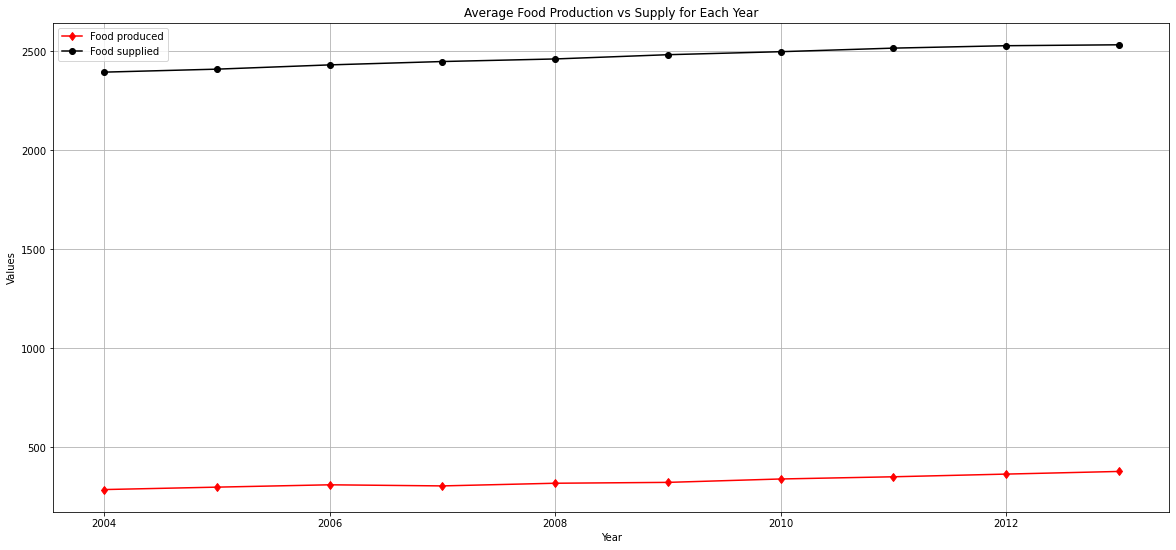

In [67]:
fig= plt.figure(figsize=(20,9))

ax = fig.add_subplot() 
ax.plot(prod_n_sup['Year'],prod_n_sup['avg_prd'],marker='d', label="Food produced", color='red')
ax.plot(prod_n_sup['Year'],prod_n_sup['avg__supplied'],marker='o', label="Food supplied", color='black')

ax.set_ylabel('Values')
ax.set_title('Average Food Production vs Supply for Each Year')
ax.set_xlabel('Year')
ax.legend()
plt.grid()
plt.show()


**Food Production (average and median)**

In [93]:
# average food production
average_food_production= f_prod['avg_prd'].mean()
print(f" The average number of food produced in Africa from 2004 to 2013 is {round(average_food_production,2)}kt")

# median food production
median_food_production= f_prod['avg_prd'].median()
print(f" The median food production value is {median_food_production}kt")

 The average number of food produced in Africa from 2004 to 2013 is 327.8kt
 The median food production value is 320.8637543252595kt


# Outliers

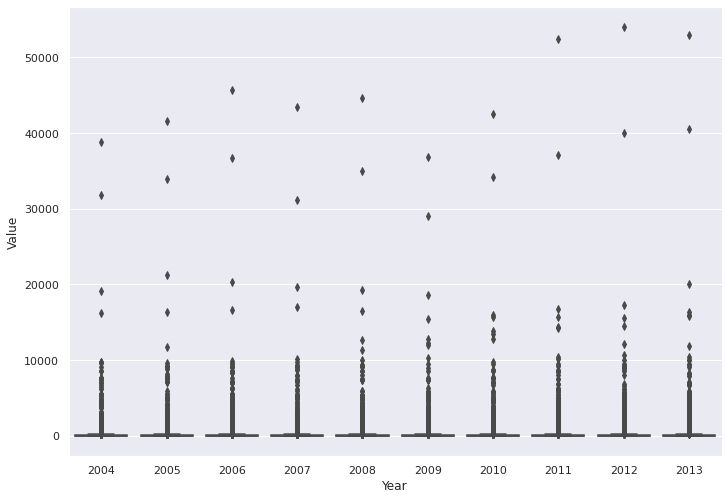

In [70]:
#boxplot for production data
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns_p = sns.boxplot(x = 'Year', y = 'Value', data = food_prod)
fig= sns_p.get_figure()
plt.show()

many outliers are there

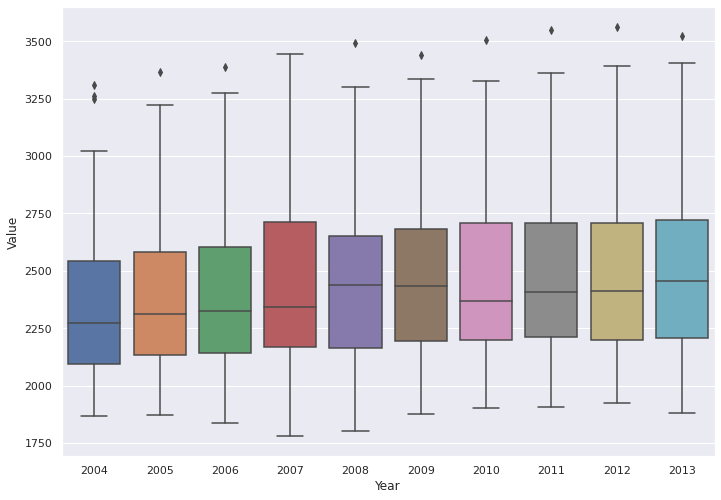

In [71]:
#box plot for supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_sup)
fig = sns_plot.get_figure()
plt.show()

Interquartile ranges (IQR)

production outlier

In [76]:
#25th percentile Q1
Q1= np.percentile(food_prod['Value'],25)
print(f"The Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(food_prod['Value'],75)
print(f"The Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"The IQR for food production data is {IQR}")

The Q1 value for food production data is 3.0
The Q3 value for food production data is 108.0
The IQR for food production data is 105.0


In [77]:
#lower bound value
lower_bound= Q1 - (1.5 * IQR)
print(f"lower_bound value for food production data is {lower_bound}")

# upper bound values
upper_bound= Q3 + (1.5 * IQR)
print(f"upper_bound value for food production data is {upper_bound}")

lower_bound value for food production data is -154.5
upper_bound value for food production data is 265.5


In [75]:
prod_outlier = food_prod[((food_prod['Value'] <= (lower_bound)) |(food_prod['Value'] >= (upper_bound)))]
prod_outlier. sort_values("Value", ascending= False)

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15449,Nigeria,Cassava and products,2013,53000
15447,Nigeria,Cassava and products,2011,52403
15442,Nigeria,Cassava and products,2006,45721
15444,Nigeria,Cassava and products,2008,44582
...,...,...,...,...
5417,Cote d'Ivoire,Cephalopods,2011,0
5416,Cote d'Ivoire,Cephalopods,2010,0
5414,Cote d'Ivoire,Cephalopods,2008,0
5413,Cote d'Ivoire,Cephalopods,2007,0


Based on the lower and upper bound outliers calculations, there are 3696 outliers in the food production dataset with extreme outliers are values in Nigeria for each year.

Supply Outliers

In [79]:
#25th percentile Q1
quartile_1= np.percentile(food_sup['Value'],25)
print(f"The Q1 value of the food supply data is {quartile_1}")

#75th percentile Q3
quartile_3= np.percentile(food_sup['Value'],75)
print(f"The Q3 value of the food supply data is {quartile_3}")

The Q1 value of the food supply data is 2174.0
The Q3 value of the food supply data is 2681.75


In [80]:
#Calculating the IQR
IQR= quartile_3-quartile_1
print(f" The IQR value of the food supply data is {IQR}")

 The IQR value of the food supply data is 507.75


In [81]:
#calculating lower bound and upper bound values
lower_bound= quartile_1 - (1.5 * IQR)
print(f"The lower_bound value for the food supply data is {lower_bound}")

upper_bound= quartile_3 + (1.5 * IQR)
print(f"The upper_bound value for the food supply data is {upper_bound}")

The lower_bound value for the food supply data is 1412.375
The upper_bound value for the food supply data is 3443.375


In [82]:
sup_outlier = food_sup[((food_sup['Value'] <= (lower_bound)) |(food_sup['Value'] >= (upper_bound)))]
sup_outlier

,Country,Year,Value
123,Egypt,2007,3445
124,Egypt,2008,3490
126,Egypt,2010,3507
127,Egypt,2011,3549
128,Egypt,2012,3561
129,Egypt,2013,3522


Hence, Egypt has highest food consuption as it has highest supply from 2004-2013.

# QUIZ

Q1. Which country produced higest amount of oats in 2010 ?

In [ ]:
#subset of the food production dataset showing food produced
#in 2010
TENS= food_prod[food_prod.Year.eq(2010)]
TENS

In [86]:
#subset of the dataframe showing countries that produced Oats
TENS[(TENS == 'Oats').any(axis=1)] 

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


HENCE ALGERIA PRODUCED HIGHEST AMOUNT OF OATS IN 2010

Q.2. which three countries have the lowest food supply between 2004 and 2006 ?

In [87]:
#creating supply dataframe that shows food supply between 2004 and 2006
supply= food_sup[(food_sup['Year'] >= 2004) & (food_sup['Year'] <= 2006)]

In [88]:
#grouping the dataframe by country to be able to sum up values 
# by country
grouped_df= supply. groupby("Country")

In [89]:
#creating a new column in the dataframe that shows the total number of food
#supplied to each country without altering the orignal dataframe
#using the transform function to create an aggregated sum
food_sup['total'] = grouped_df[["Value"]]. transform(sum)

In [90]:
pd.set_option('display.max_rows', None) #display all rows

#sorting the dataframe by the aggregated sum of food supplied 
#to each country from the lowest to the highest
food_sup. sort_values("total", ascending=True)

,Country,Year,Value,total
432,Zambia,2006,1838,5577.0
431,Zambia,2005,1873,5577.0
430,Zambia,2004,1866,5577.0
132,Ethiopia,2006,1967,5827.0
131,Ethiopia,2005,1978,5827.0
130,Ethiopia,2004,1882,5827.0
70,Central African Republic,2004,1989,6044.0
72,Central African Republic,2006,2029,6044.0
71,Central African Republic,2005,2026,6044.0
322,Rwanda,2006,2044,6050.0


Zambia, Ethopia and Central African Republic had the lowest food supply between 2004 and 2006